On Twitter, @john_chandler said that he thought ["people in strong Leave areas are the bulk of the anti-Trump petition signers."](https://twitter.com/john_chandler/status/826002458216370176).

I think the data suggests otherwise.

If we work on the assumption that the number of signatures on the [Brexit petition](https://petition.parliament.uk/petitions/131215) for a constituency correlates with the strength of anti-Brexit feeling, we see that there is a strong correlation between the number of signatures on that petition, and the number on the [Trump petition](https://petition.parliament.uk/petitions/171928).

In [1]:
%matplotlib inline
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_signatures_by_constituency(petition_id):
    rsp = requests.get('https://petition.parliament.uk/petitions/{}.json'.format(petition_id))
    data = rsp.json()['data']['attributes']['signatures_by_constituency']
    return {record['name']: record['signature_count'] for record in data}

In [3]:
trump = get_signatures_by_constituency(171928)

In [4]:
brexit = get_signatures_by_constituency(131215)

In [5]:
df = pd.DataFrame({'Trump': trump, 'Brexit': brexit})

In [6]:
df.head()

,Brexit,Trump
Aberavon,2041,513
Aberconwy,3251,752
Aberdeen North,3820,1509
Aberdeen South,4930,1631
Airdrie and Shotts,1369,707


In [7]:
df.corr()

,Brexit,Trump
Brexit,1.000000,0.921108
Trump,0.921108,1.000000


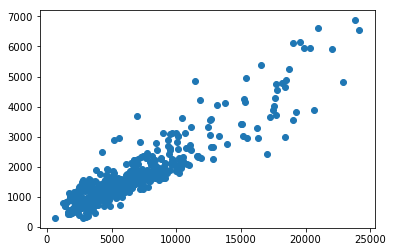

In [8]:
plt.scatter(df['Brexit'], df['Trump']);